In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, _ in os.walk('/kaggle/input'):
#         print(dirname)

In [2]:
train_path = r"C:\Users\Asus TUF\OneDrive\Desktop\xxxx\archive (10)\DATASET\TRAIN"
test_path = r"C:\Users\Asus TUF\OneDrive\Desktop\xxxx\archive (10)\DATASET\TEST"

## Import Libraries

In [3]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

## Visualization

In [4]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        if(img_array is not None):
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [01:06<00:00, 150.02it/s]


In [5]:
# img_array=cv2.imread(file)
# if(img_array is not None):
#     img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

In [6]:
data.shape

(22564, 2)

In [7]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\Asus TUF\\OneDrive\\Desktop\\xxxx\\archive (10)\\DATASET\\TRAIN\\O': 12565,
         'C:\\Users\\Asus TUF\\OneDrive\\Desktop\\xxxx\\archive (10)\\DATASET\\TRAIN\\R': 9999})

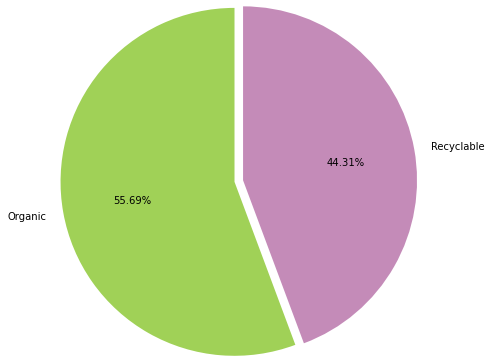

In [8]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

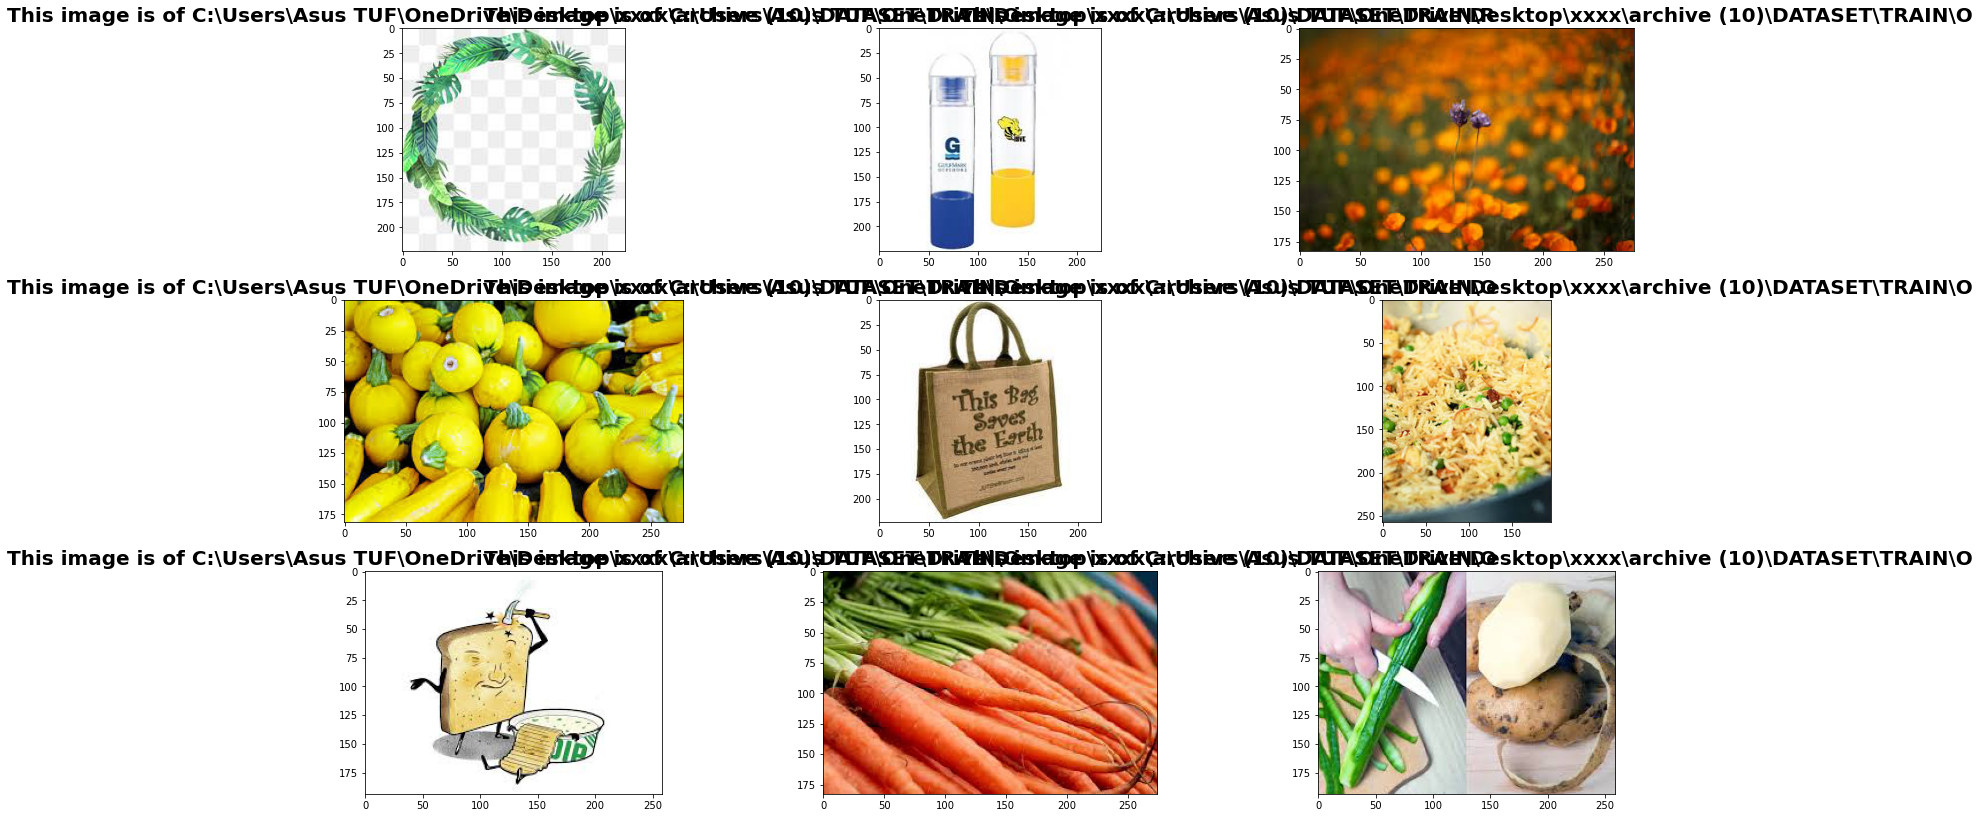

In [9]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [10]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy','Precision','Recall'])

batch_size = 256

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [22]:
hist = model.fit(train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
89/89 [==============================] - 956s 11s/step - loss: 0.4891 - accuracy: 0.7913 - precision: 0.7800 - recall: 0.7959 - val_loss: 0.3329 - val_accuracy: 0.8691 - val_precision: 0.8725 - val_recall: 0.8663
Epoch 2/10
89/89 [==============================] - 922s 10s/step - loss: 0.3818 - accuracy: 0.8403 - precision: 0.8406 - recall: 0.8403 - val_loss: 0.3288 - val_accuracy: 0.8754 - val_precision: 0.8738 - val_recall: 0.8758
Epoch 3/10
89/89 [==============================] - 874s 10s/step - loss: 0.3537 - accuracy: 0.8596 - precision: 0.8598 - recall: 0.8593 - val_loss: 0.3082 - val_accuracy: 0.8870 - val_precision: 0.8880 - val_recall: 0.8866
Epoch 4/10
89/89 [==============================] - 888s 10s/step - loss: 0.3273 - accuracy: 0.8717 - precision: 0.8719 - recall: 0.8704 - val_loss: 0.3096 - val_accuracy: 0.8834 - val_precision: 0.8841 - val_recall: 0.8834
Epoch 5/10
89/89 [==============================] - 918s 10s/step - loss: 0.3051 - accuracy: 0.8768 - pr

In [23]:
#Saving the model
model.save(r"C:\Users\Asus TUF\OneDrive\Desktop\ISWARYA_THESIS_FOLDER\CNN_model_integration.h5")

In [24]:
import keras
model_dl = keras.models.load_model(r"C:\Users\Asus TUF\OneDrive\Desktop\ISWARYA_THESIS_FOLDER\CNN_model_integration.h5") #look for local saved file

In [ ]:


# from keras.preprocessing import image
# img = image.load_img(r"C:\Users\Asus TUF\OneDrive\Desktop\O_12739.jpg", target_size=(224,224,3))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# image = np.vstack([x])
# classes = model_dl.predict(image, batch_size=256)
# probabilities = model_dl.predict_proba(image, batch_size= 256)
# probabilities_formatted = list(map("{:.2f}%".format, probabilities[0]*100))

# # print(probabilities_formatted) 
# if probabilities_formatted == ['100.00%', '0.00%']:
#     print('The recognized image is an Organic waste')
#     plt.imshow(img)    
# else:
#     print('The recognized image is an recycling waste')
#     plt.imshow(img) 

IndentationError: unexpected indent (<ipython-input-1-60618162e43a>, line 18)

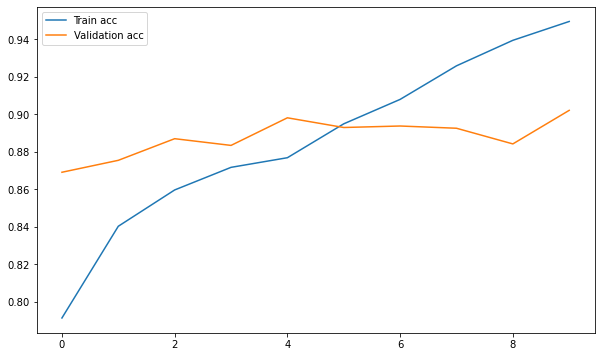

In [25]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

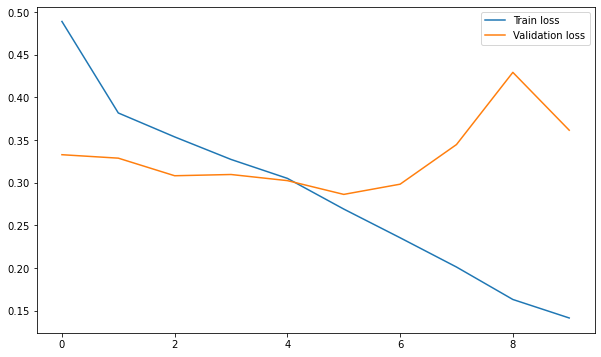

In [26]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()